In [30]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
#import mplfinance as mpf
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings
import requests
import cvxpy as cp

import yfinance as yf
#import quandl as ql

import statsmodels.api as sm

#from utils import dibuja_covar, dibuja_covar_ax

# print(plt.style.available) #list of available styles
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
data_OHLC_df = pd.read_excel('../data/data_OHLC.xlsx', header=[0, 1], index_col=0, parse_dates=True)
data_close_df = data_OHLC_df['Adj Close'].dropna()
ret_close_df = np.log(data_close_df).diff().dropna().loc[:, ['BTC-USD', 'ELE.MC', 'IAU', 'IEF']]

In [11]:
ret_close_df

,BTC-USD,ELE.MC,IAU,IEF
Date,,,,
2014-09-18,-0.074643,0.008327,0.002533,-0.000683
2014-09-19,-0.072402,0.004727,-0.005920,0.003795
2014-09-22,0.018461,0.009055,-0.002548,0.002135
2014-09-23,0.080333,0.001501,0.005935,0.002130
2014-09-24,-0.029306,0.012587,-0.003387,-0.002809
...,...,...,...,...
2023-09-28,0.025063,-0.003376,-0.005360,0.002734
2023-09-29,-0.004073,0.002858,-0.010236,0.000218
2023-10-02,0.022743,-0.036185,-0.010053,-0.008145


In [14]:
start = '2014-09-17'
end = '2023-10-04'


assets = ['BA', 'BAX', 'BMY', 'CMCSA', 'CNP', 'CPB', 'DE', 'F', 'GE', 'HPQ', 
        'JCI', 'JPM','KHC', 'LUV', 'MMC', 'MO', 'NI', 'PCAR', 'PSA', 'SEE', 
        'T', 'TGT', 'TMO','TXT', 'VZ', 'ZION']

# Downloading data
prices = yf.download(assets, start = start, end = end)['Adj Close']
prices.columns = assets

[*********************100%%**********************]  26 of 26 completed


In [15]:
returns = np.log(prices).diff().dropna()
returns

,BA,BAX,BMY,CMCSA,CNP,CPB,DE,F,GE,HPQ,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-07,0.018543,-0.024752,0.010757,0.006419,0.019578,0.014908,0.007402,0.004048,0.006063,0.007495,...,0.016490,0.003577,0.022569,0.003248,0.004483,0.018163,0.004286,-0.003387,0.004454,-0.021060
2015-07-08,-0.008629,-0.016574,-0.007208,-0.013205,-0.019578,-0.008582,-0.013805,-0.032857,-0.022155,-0.011428,...,0.001167,-0.023246,0.003109,-0.023935,-0.010229,-0.011553,-0.021224,-0.028681,-0.002573,-0.026208
2015-07-09,0.006182,0.014146,0.002212,0.005174,-0.014147,-0.002924,-0.004433,-0.002788,0.005009,-0.001973,...,-0.023017,-0.000477,0.002326,-0.001955,-0.011565,-0.005285,-0.002968,0.016850,-0.006894,0.021942
2015-07-10,0.011696,0.015812,0.020123,0.018850,0.008931,0.010555,0.006642,0.010413,0.009562,0.008519,...,0.009507,0.007760,0.012312,0.013222,0.007532,0.010422,0.021746,-0.000229,0.015870,0.020183
2015-07-13,0.014703,-0.000267,0.005614,0.008353,0.002611,0.004400,0.011492,0.010989,0.007584,0.002932,...,0.000000,0.018908,0.002902,0.019700,0.006616,0.002262,0.027633,0.012965,0.004246,0.008983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-27,-0.000920,0.000268,-0.011166,0.008104,-0.005143,-0.007210,0.012382,-0.003223,0.008695,-0.003115,...,-0.021996,0.011265,0.004008,-0.009095,-0.010037,0.002372,-0.006601,0.011851,-0.018046,-0.024421
2023-09-28,-0.026071,0.005610,0.004309,0.005813,-0.016713,-0.004836,0.004481,0.013627,0.012991,-0.002734,...,-0.023304,0.010556,-0.002645,0.024278,0.009371,-0.001642,0.009448,-0.003172,0.004619,0.023243
2023-09-29,0.006543,0.005313,-0.001721,-0.011659,0.005602,-0.004372,-0.019289,-0.011209,-0.016062,0.005071,...,0.003247,-0.008083,-0.002880,0.010401,0.000666,0.009176,0.006243,-0.007014,-0.004310,0.027311


In [24]:
retornos_finales = pd.concat([ret_close_df, returns], axis=1).dropna()

### CARTERA MÍNIMO RIESGO

In [37]:
num_act = len(retornos_finales.columns)

matriz_cov = retornos_finales.cov().to_numpy()
retornos_esperados = retornos_finales.mean().to_numpy()
std_esperados = retornos_finales.std().to_numpy()

In [31]:
#Variables de decisión
pesos = cp.Variable(num_act)

#Restricciones
constraints = [pesos >= 0,  # No shorting
               cp.sum(pesos) == 1, # Fully invested
            ]
               #Función Objetivo

riesgo = cp.quad_form(pesos, matriz_cov) # Riesgo de la cartera
objective = cp.Minimize(riesgo) # Minimizar la varianza

#Problema y resuelvo
prob = cp.Problem(objective, constraints)
resultado = prob.solve()

pesos_ajustados = np.array([np.round(x, 3) if x > 10**-4 else 0  for x in pesos.value])
pesos_ajustados

array([0.   , 0.011, 0.005, 0.812, 0.   , 0.019, 0.02 , 0.   , 0.   ,
       0.017, 0.009, 0.   , 0.   , 0.   , 0.   , 0.039, 0.   , 0.   ,
       0.   , 0.013, 0.   , 0.017, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.015, 0.022])

In [34]:
ret_cartera_min =  retornos_finales @ pesos_ajustados 

In [ ]:
# 2. Calcula el Var paramétrico y el Var histórico para un nivel de confianza del 95%
confianza = 0.95

# Calcular el VaR usando el método de la distribución normal
varn_95_assets = stats.norm.ppf(1 - confianza, mu_elec, sigma_elec)
varn_95_ief = stats.norm.ppf(1 - confianza, mu_ief, sigma_ief)

In [41]:
var_95_assets = np.percentile(retornos_finales, 5, axis=0)
var_95_cartera_min = np.percentile(ret_cartera_min, 5)

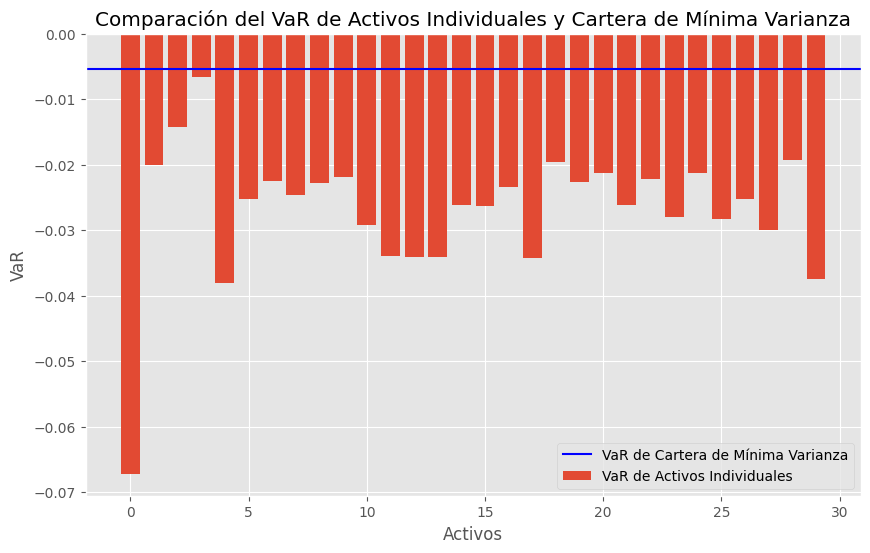

In [46]:
# Generando el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de barras para los VaR de los activos individuales
plt.bar(range(len(var_95_assets)), var_95_assets, label='VaR de Activos Individuales')

# Línea horizontal para el VaR de la cartera de mínima varianza
plt.axhline(y=var_95_cartera_min, color='b', linestyle='-', label='VaR de Cartera de Mínima Varianza')

plt.xlabel('Activos')
plt.ylabel('VaR')
plt.title('Comparación del VaR de Activos Individuales y Cartera de Mínima Varianza')
plt.legend()

In [47]:
confianza = 0.95
var_norm_assets = stats.norm.ppf(1 - confianza, retornos_esperados, std_esperados)
var_norm_cartera_min = stats.norm.ppf(1 - confianza, ret_cartera_min.mean(), ret_cartera_min.std())

var_hist_assets = np.percentile(retornos_finales, 5, axis=0)
var_hist_cartera_min = np.percentile(ret_cartera_min, 5)


In [50]:
100*(var_norm_assets-var_hist_assets)/var_hist_assets

array([ 6.6575664 , 12.3580464 ,  0.98758518,  4.20300485, 14.5758241 ,
        3.85284404, 13.11629393,  7.0381701 , 25.41735695, 18.20648744,
        7.43603067, 10.91018831, 11.18671746,  6.19074744,  6.84912289,
        9.90100867, 26.90692984,  7.52754056,  8.33410153,  6.01931137,
       17.26852655,  1.61734984,  7.75363727, 16.42489163, 13.91183045,
       16.12259643,  2.927388  , 19.39651868,  3.00780119,  9.71513687])

In [51]:
100*(var_norm_cartera_min-var_hist_cartera_min)/var_hist_cartera_min

1.30350848786824

In [55]:
from scipy.stats import skew, kurtosis

print(skew(ret_cartera_min), kurtosis(ret_cartera_min))

-0.1927945819379374 4.834202097056809


In [57]:
skew(retornos_finales)

array([-0.66413061, -1.43260658, -0.12562449,  0.159068  , -0.50710555,
       -1.13529465, -1.70715519, -0.19680136, -1.5633875 , -0.61500302,
       -0.31142523,  0.14029185, -0.15717497, -0.809301  , -0.58549185,
       -0.03472718, -2.60754371, -0.33282589, -0.42412006, -0.99986574,
       -1.08346101,  0.18934214, -0.82568634, -0.16888602, -0.58104168,
       -1.35822189, -0.14119793, -0.48492315, -0.13672578, -0.59251074])

In [58]:
kurtosis(retornos_finales)

array([ 9.27721186, 15.90770627,  3.04868339,  3.90422589, 17.47983255,
       10.54883463, 15.72459434,  5.6824423 , 31.82938941,  9.1981912 ,
        7.6373172 ,  7.11070453,  6.08255983, 10.89794959,  6.32868145,
       13.18391551, 60.75039968,  6.38296009, 13.85973802,  7.65784959,
       21.86623765,  4.99294548,  6.18018551, 17.19681263,  8.903719  ,
       29.48833854,  3.44418707, 10.90210296,  5.24778016, 15.20422784])

In [61]:
100*252*retornos_finales.mean()

BTC-USD    56.627374
ELE.MC      8.093962
IAU         5.190350
IEF        -0.151550
BA          6.068376
BAX         1.176889
BMY         0.144156
CMCSA       6.121796
CNP         8.341316
CPB         0.856562
DE         18.522663
F           1.998665
GE         -2.998859
HPQ        10.951883
JCI         6.282601
JPM        11.699165
KHC        -4.830647
LUV        -0.413707
MMC        16.450136
MO          4.435668
NI          8.557513
PCAR       11.370761
PSA         7.198092
SEE        -3.579832
T           0.941175
TGT         5.298474
TMO        16.316895
TXT         8.033347
VZ          0.473618
ZION        3.576835
dtype: float64

In [62]:
100*252*ret_cartera_min.mean()

0.9914647975148083